# Name: Md. Jamil Istiaq
# ID: 18-37918-2
 Section: A |----|
 Course: CVPR |----|
 Mid_Assignment

# Import Necessary items

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST Dataset 

In [2]:
(x_train, y_train),(x_test, y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
#Print shape of the Train and Test Data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


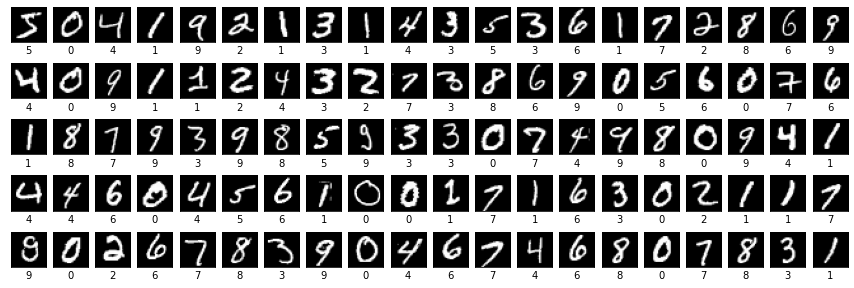

In [4]:
#Preview 100 image from the TRAIN Data

i=0
plt.figure(figsize=(15,5))
for i in range(100):
    plt.subplot(5,20,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])

plt.show()

# Reshape the shape of Train & Test for CNN, As CNN allows a color channel.

In [5]:
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

In [6]:
#print the New Shape
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Normalize 

In [19]:
x_train_nm,x_test_nm=x_train.astype('float32')/255, x_test.astype('float32')/255

# Without Normalize

In [7]:
x_train=x_train;
x_test=x_test;

# Build the Model, 3H.L, maxpool, relu, softmax

In [8]:
model= tf.keras.Sequential([
        
    #input layer
        tf.keras.Input(shape=(28,28,1)),
        
    #1st hidden layer
        tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        
    #2nd hidden layer
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        
    #3rd hidden layer
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        
    #Convert data 1-dimensional array for Next input layer
        tf.keras.layers.Flatten(),
        
    #Dense layer
        tf.keras.layers.Dense(units=256, activation='relu'),
        
    #output layer
        tf.keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [9]:
model_adam=model;
model_sgd=model;
model_rmsprop=model;

# Use Optimizer ADAM 

In [20]:
#Complie Model
model_adam.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# With Normalize Data

In [21]:
#Run model for the Train Data
history_adam = model_adam.fit(x=x_train_nm, y=y_train, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0862 - accuracy: 0.9770 - val_loss: 0.0363 - val_accuracy: 0.9890
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.0370 - val_accuracy: 0.9896
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0115 - accuracy: 0.9966 - val_loss: 0.0376 - val_accuracy: 0.9901
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0090 - accuracy: 0.9973 - val_loss: 0.0445 - val_accuracy: 0.9893
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.0400 - val_accuracy: 0.9904
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.0390 - val_accuracy: 0.9905
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.0410 - val_accuracy: 0.9908
Epoch 

In [22]:
#Print Model Evaluation Data
test_loss, test_acc = model_adam.evaluate(x_test_nm, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0337 - accuracy: 0.9910

Test Accuracy: 0.9909999966621399

Test Loss: 0.03373723477125168


# Without Normalize Data

In [11]:
#Run model for the Train Data
h_wnm = model_adam.fit(x=x_train, y=y_train, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
750/750 [==============================] - 6s 5ms/step - loss: 0.4016 - accuracy: 0.9118 - val_loss: 0.1070 - val_accuracy: 0.9679
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0829 - accuracy: 0.9738 - val_loss: 0.0726 - val_accuracy: 0.9792
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0596 - accuracy: 0.9813 - val_loss: 0.0634 - val_accuracy: 0.9815
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0541 - accuracy: 0.9834 - val_loss: 0.0808 - val_accuracy: 0.9799
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0490 - accuracy: 0.9851 - val_loss: 0.0855 - val_accuracy: 0.9787
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0431 - accuracy: 0.9864 - val_loss: 0.0826 - val_accuracy: 0.9785
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0400 - accuracy: 0.9875 - val_loss: 0.0675 - val_accuracy: 0.9833
Epoch 

In [12]:
#Print Model Evaluation Data
test_loss, test_acc = model_adam.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0654 - accuracy: 0.9852

Test Accuracy: 0.9851999878883362

Test Loss: 0.0654081404209137


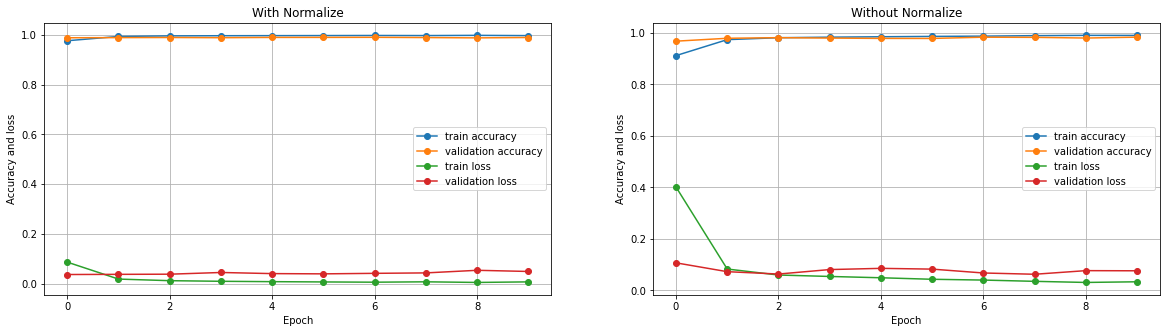

In [23]:
#Ploting History of the Model with normalize data
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history_adam.history['accuracy'], 'o-', label='train accuracy')
plt.plot(history_adam.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.plot(history_adam.history['loss'], 'o-', label='train loss')
plt.plot(history_adam.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and loss')
plt.grid(True)
plt.title("With Normalize")
plt.legend(loc='center right')


#Ploting History of the Model without normalize data
plt.subplot(1,2,2)
plt.plot(h_wnm.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h_wnm.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.plot(h_wnm.history['loss'], 'o-', label='train loss')
plt.plot(h_wnm.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and loss')
plt.title("Without Normalize")
plt.grid(True)
plt.legend(loc='center right')

plt.show()

# Use Optimizer SGD with Normalize Data

In [24]:
#Complie Model
model_sgd.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# With Normalize Data

In [25]:
#Run model for the Train Data
history_sgd = model_sgd.fit(x=x_train_nm, y=y_train, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0444 - val_accuracy: 0.9911
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 6.9151e-04 - accuracy: 0.9999 - val_loss: 0.0441 - val_accuracy: 0.9918
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 5.2136e-04 - accuracy: 1.0000 - val_loss: 0.0441 - val_accuracy: 0.9916
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 4.2616e-04 - accuracy: 1.0000 - val_loss: 0.0441 - val_accuracy: 0.9917
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 3.6381e-04 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9918
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 3.2334e-04 - accuracy: 1.0000 - val_loss: 0.0443 - val_accuracy: 0.9917
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 2.9281e-04 - accuracy: 1.0000 - val_loss: 0.0444 - val

In [26]:
#Print Model Evaluation Data
test_loss, test_acc = model_sgd.evaluate(x_test_nm, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0287 - accuracy: 0.9938

Test Accuracy: 0.9937999844551086

Test Loss: 0.028702901676297188


# Without Normalize Data

In [14]:
#Run model for the Train Data
s_wnm = model_sgd.fit(x=x_train, y=y_train, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.0517 - val_accuracy: 0.9889
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0538 - val_accuracy: 0.9880
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 0.0547 - val_accuracy: 0.9896
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0561 - val_accuracy: 0.9893
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 8.0331e-04 - accuracy: 0.9999 - val_loss: 0.0582 - val_accuracy: 0.9897
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 5.2010e-04 - accuracy: 1.0000 - val_loss: 0.0588 - val_accuracy: 0.9895
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 3.9220e-04 - accuracy: 1.0000 - val_loss: 0.0598 - val_accuracy: 0

In [15]:
#Print Model Evaluation Data
test_loss, test_acc = model_sgd.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0508 - accuracy: 0.9921

Test Accuracy: 0.9921000003814697

Test Loss: 0.050788700580596924


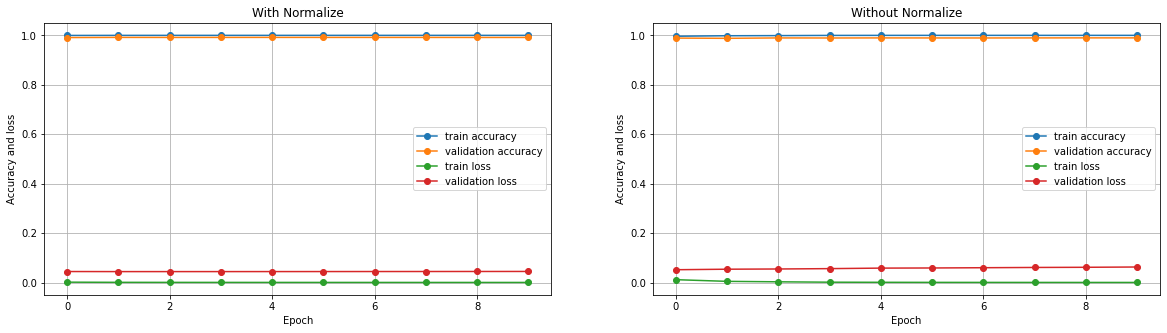

In [27]:
#Ploting History of the Model with normalize data
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history_sgd.history['accuracy'], 'o-', label='train accuracy')
plt.plot(history_sgd.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.plot(history_sgd.history['loss'], 'o-', label='train loss')
plt.plot(history_sgd.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and loss')
plt.title("With Normalize")
plt.grid(True)
plt.legend(loc='center right')


#Ploting History of the Model without normalize
plt.subplot(1,2,2)
plt.plot(s_wnm.history['accuracy'], 'o-', label='train accuracy')
plt.plot(s_wnm.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.plot(s_wnm.history['loss'], 'o-', label='train loss')
plt.plot(s_wnm.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and loss')
plt.title("Without Normalize")
plt.grid(True)
plt.legend(loc='center right')

plt.show()

# Use Optimizer RMSPROP with Normalize Data

In [28]:
#Complie Model
model_rmsprop.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# With Normalize Data

In [29]:
#Run model for the Train Data
history_rmsprop = model_rmsprop.fit(x=x_train_nm, y=y_train, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0655 - val_accuracy: 0.9916
Epoch 2/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0773 - val_accuracy: 0.9916
Epoch 3/10
750/750 [==============================] - 4s 6ms/step - loss: 6.0301e-04 - accuracy: 0.9998 - val_loss: 0.0985 - val_accuracy: 0.9898
Epoch 4/10
750/750 [==============================] - 5s 6ms/step - loss: 6.6711e-04 - accuracy: 0.9997 - val_loss: 0.0921 - val_accuracy: 0.9918
Epoch 5/10
750/750 [==============================] - 4s 6ms/step - loss: 6.9063e-04 - accuracy: 0.9998 - val_loss: 0.0898 - val_accuracy: 0.9918
Epoch 6/10
750/750 [==============================] - 4s 6ms/step - loss: 2.8957e-04 - accuracy: 0.9999 - val_loss: 0.1109 - val_accuracy: 0.9898
Epoch 7/10
750/750 [==============================] - 5s 6ms/step - loss: 7.5669e-04 - accuracy: 0.9998 - val_loss: 0.1008 - val_acc

In [30]:
#Print Model Evaluation Data
test_loss, test_acc = model_rmsprop.evaluate(x_test_nm, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0794 - accuracy: 0.9931

Test Accuracy: 0.9930999875068665

Test Loss: 0.07939954102039337


# Without Normalize Data

In [17]:
#Run model for the Train Data
r_wnm = model_rmsprop.fit(x=x_train, y=y_train, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0240 - accuracy: 0.9944 - val_loss: 0.0913 - val_accuracy: 0.9864
Epoch 2/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0279 - accuracy: 0.9944 - val_loss: 0.1399 - val_accuracy: 0.9840
Epoch 3/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0306 - accuracy: 0.9937 - val_loss: 0.1167 - val_accuracy: 0.9851
Epoch 4/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0226 - accuracy: 0.9952 - val_loss: 0.1119 - val_accuracy: 0.9872
Epoch 5/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0235 - accuracy: 0.9952 - val_loss: 0.1290 - val_accuracy: 0.9874
Epoch 6/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0248 - accuracy: 0.9956 - val_loss: 0.1441 - val_accuracy: 0.9856
Epoch 7/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0265 - accuracy: 0.9950 - val_loss: 0.1435 - val_accuracy: 0.9859
Epoch 

In [18]:
#Print Model Evaluation Data
test_loss, test_acc = model_rmsprop.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.1440 - accuracy: 0.9884

Test Accuracy: 0.9883999824523926

Test Loss: 0.14396536350250244


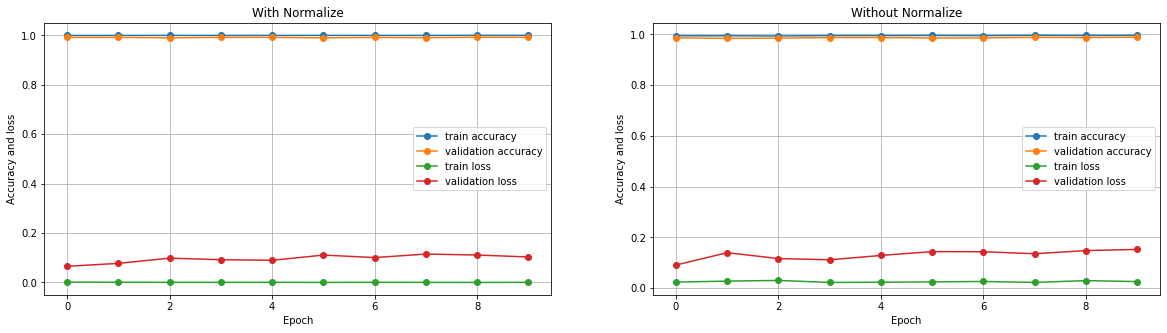

In [31]:
#Ploting History of the Model with normalize
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history_rmsprop.history['accuracy'], 'o-', label='train accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.plot(history_rmsprop.history['loss'], 'o-', label='train loss')
plt.plot(history_rmsprop.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and loss')
plt.title("With Normalize")
plt.grid(True)
plt.legend(loc='center right')


#Ploting History of the Model without normalize
plt.subplot(1,2,2)
plt.plot(r_wnm.history['accuracy'], 'o-', label='train accuracy')
plt.plot(r_wnm.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.plot(r_wnm.history['loss'], 'o-', label='train loss')
plt.plot(r_wnm.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and loss')
plt.title("Without Normalize")
plt.grid(True)
plt.legend(loc='center right')

plt.show()

# ADAM vs SGD vs RMSProp with Normalize Data

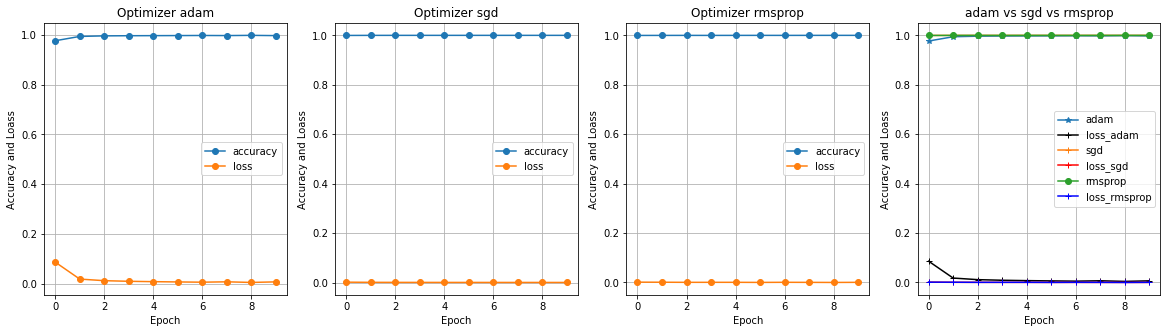

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.plot(history_adam.history['accuracy'],'o-',label='accuracy')
plt.plot(history_adam.history['loss'],'o-',label='loss')
plt.grid(True)
plt.legend(loc='center right')
plt.xlabel("Epoch")
plt.ylabel("Accuracy and Loass")
plt.title("Optimizer adam")

plt.subplot(1,4,2)
plt.plot(history_sgd.history['accuracy'],'o-',label='accuracy')
plt.plot(history_sgd.history['loss'],'o-',label='loss')
plt.grid(True)
plt.legend(loc='center right')
plt.xlabel("Epoch")
plt.ylabel("Accuracy and Loass")
plt.title("Optimizer sgd")

plt.subplot(1,4,3)
plt.plot(history_rmsprop.history['accuracy'],'o-',label='accuracy')
plt.plot(history_rmsprop.history['loss'],'o-',label='loss')
plt.grid(True)
plt.legend(loc='center right')
plt.xlabel("Epoch")
plt.ylabel("Accuracy and Loass")
plt.title("Optimizer rmsprop")

plt.subplot(1,4,4)
plt.plot(history_adam.history['accuracy'],'*-',label='adam')
plt.plot(history_adam.history['loss'],'k+-',label='loss_adam')
plt.plot(history_sgd.history['accuracy'],'+-',label='sgd')
plt.plot(history_sgd.history['loss'],'r+-',label='loss_sgd')
plt.plot(history_rmsprop.history['accuracy'],'o-',label='rmsprop')
plt.plot(history_rmsprop.history['loss'],'b+-',label='loss_rmsprop')
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Accuracy and Loass")
plt.title("adam vs sgd vs rmsprop")
plt.legend(loc='center right')

plt.show()

# ADAM vs SGD vs RMSProp without Normalize Data

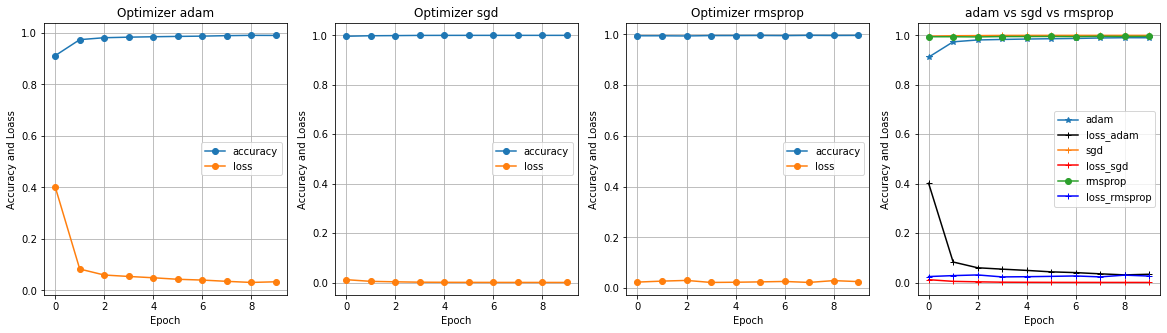

In [33]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.plot(h_wnm.history['accuracy'],'o-',label='accuracy')
plt.plot(h_wnm.history['loss'],'o-',label='loss')
plt.grid(True)
plt.legend(loc='center right')
plt.xlabel("Epoch")
plt.ylabel("Accuracy and Loass")
plt.title("Optimizer adam")

plt.subplot(1,4,2)
plt.plot(s_wnm.history['accuracy'],'o-',label='accuracy')
plt.plot(s_wnm.history['loss'],'o-',label='loss')
plt.grid(True)
plt.legend(loc='center right')
plt.xlabel("Epoch")
plt.ylabel("Accuracy and Loass")
plt.title("Optimizer sgd")

plt.subplot(1,4,3)
plt.plot(r_wnm.history['accuracy'],'o-',label='accuracy')
plt.plot(r_wnm.history['loss'],'o-',label='loss')
plt.grid(True)
plt.legend(loc='center right')
plt.xlabel("Epoch")
plt.ylabel("Accuracy and Loass")
plt.title("Optimizer rmsprop")

plt.subplot(1,4,4)
plt.plot(h_wnm.history['accuracy'],'*-',label='adam')
plt.plot(h_wnm.history['loss'],'k+-',label='loss_adam')
plt.plot(s_wnm.history['accuracy'],'+-',label='sgd')
plt.plot(s_wnm.history['loss'],'r+-',label='loss_sgd')
plt.plot(r_wnm.history['accuracy'],'o-',label='rmsprop')
plt.plot(r_wnm.history['loss'],'b+-',label='loss_rmsprop')
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Accuracy and Loass")
plt.title("adam vs sgd vs rmsprop")
plt.legend(loc='center right')

plt.show()

# Prediction using SGD 

In [34]:
predictions = model_sgd.predict(x_test)

In [35]:
predictions[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [36]:
np.argmax(predictions[5])

1

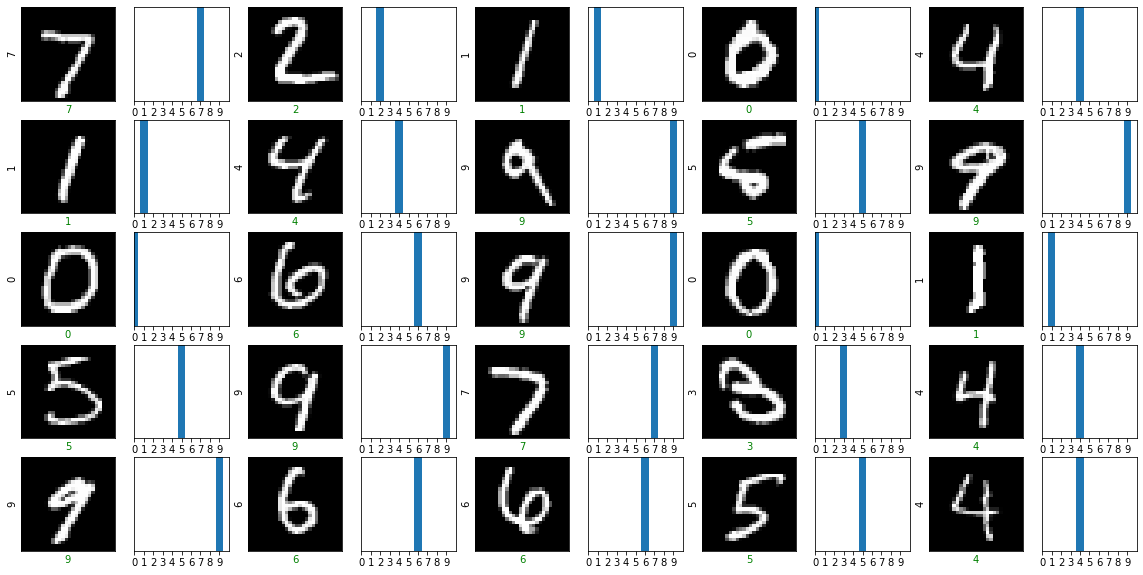

In [37]:
rows = 5
cols = 5

x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2]))

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(x_test[i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(y_test[i])
    if y_test[i] == np.argmax(predictions[i]):
        plt.xlabel(np.argmax(predictions[i]), color='g')
    else:
        plt.xlabel(np.argmax(predictions[i]), color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()